# Fusionner dataset

In [1]:
# =========================
# 01_exploration.ipynb
# Fusion et exploration CICIDS2017
# =========================

# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 2. Chemin vers les données
data_path = "../data/raw/"

files = [
    "Monday-WorkingHours.pcap_ISCX.csv",
    "Tuesday-WorkingHours.pcap_ISCX.csv",
    "Wednesday-workingHours.pcap_ISCX.csv",
    "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv"
]

# 3. Fusion des fichiers
df_list = []

for file in files:
    path = os.path.join(data_path, file)
    print(f"Chargement : {file}")
    df_list.append(pd.read_csv(path))

df = pd.concat(df_list, ignore_index=True)

print("\nFusion terminée")
print("Shape :", df.shape)

# 4. Aperçu
df.head()


Chargement : Monday-WorkingHours.pcap_ISCX.csv
Chargement : Tuesday-WorkingHours.pcap_ISCX.csv
Chargement : Wednesday-workingHours.pcap_ISCX.csv
Chargement : Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Chargement : Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Chargement : Friday-WorkingHours-Morning.pcap_ISCX.csv
Chargement : Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Chargement : Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv

Fusion terminée
Shape : (2830743, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [2]:
# Nettoyer les noms de colonnes
df.columns = df.columns.str.strip()



In [3]:

print("\nColonnes disponibles:")
print(df.columns)


Colonnes disponibles:
Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Coun

# Comprendre distribution des Label 

In [4]:
df['Label'] = (
    df['Label']
    .astype(str)
    .str.encode('latin1', errors='ignore')
    .str.decode('utf-8', errors='ignore')
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)

Label
BENIGN                      2273097
DoS Hulk                     231073
PortScan                     158930
DDoS                         128027
DoS GoldenEye                 10293
FTP-Patator                    7938
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1966
Web Attack Brute Force         1507
Web Attack XSS                  652
Infiltration                     36
Web Attack Sql Injection         21
Heartbleed                       11
Name: count, dtype: int64


c:\Users\Roua\Desktop\IDS\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Roua\Desktop\IDS\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


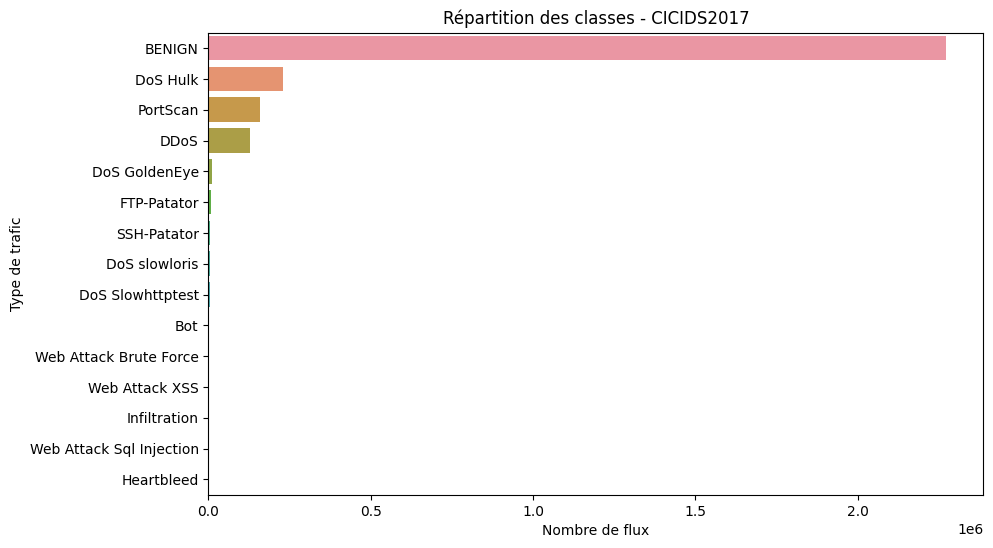

In [5]:
# Vérifier les labels
print(df["Label"].value_counts())

# Graphique
plt.figure(figsize=(10,6))
sns.countplot(
    y="Label",
    data=df,
    order=df["Label"].value_counts().index
)
plt.title("Répartition des classes - CICIDS2017")
plt.xlabel("Nombre de flux")
plt.ylabel("Type de trafic")
plt.show()


In [6]:
df["Label"] = df["Label"].str.replace(r"\s+", " ", regex=True)
df["Label"] = df["Label"].str.strip()


# Ajout des colonnes Label 

In [7]:
# Ajout d'une colonne Label_Original pour conserver les labels originaux
df["Label_Original"] = df["Label"]


In [8]:
# Function to map attack labels to families
def map_attack_family(label):
    if label == "BENIGN":
        return "BENIGN"
    elif label in [
        "DoS Hulk", "DoS GoldenEye",
        "DoS slowloris", "DoS Slowhttptest"
    ]:
        return "DoS"
    elif label in [
        "FTP-Patator", "SSH-Patator",
        "Web Attack Brute Force"
    ]:
        return "BruteForce"
    elif label in [
        "Web Attack XSS",
        "Web Attack Sql Injection"
    ]:
        return "WebAttack"
    elif label == "DDoS":
        return "DDoS"
    elif label == "PortScan":
        return "PortScan"
    elif label == "Bot":
        return "Bot"
    elif label in ["Infiltration", "Heartbleed"]:
        return "RareAttack"
    else:
        return "Other"

df["Attack_Family"] = df["Label"].apply(map_attack_family)


In [9]:
# Création d'une colonne Attack_Family

df["Attack_Family"] = df["Label"].apply(map_attack_family)


In [10]:
print(df["Attack_Family"].value_counts())


Attack_Family
BENIGN        2273097
DoS            252661
PortScan       158930
DDoS           128027
BruteForce      15342
Bot              1966
WebAttack         673
RareAttack         47
Name: count, dtype: int64


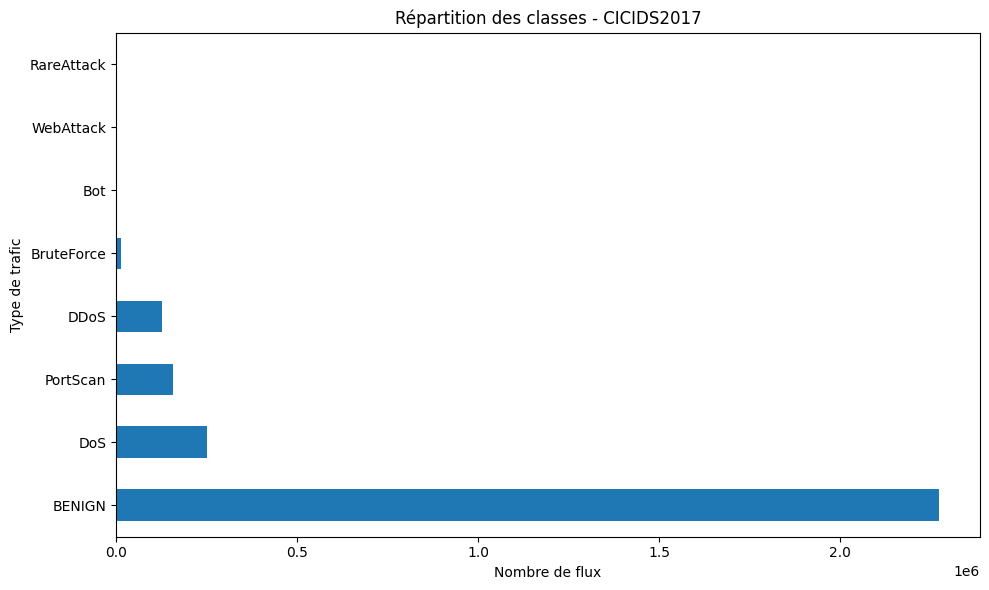

In [11]:
import matplotlib.pyplot as plt

# Créer un graphique de la répartition des familles d'attaques
plt.figure(figsize=(10,6))
df['Attack_Family'].value_counts().plot(kind='barh')
plt.title("Répartition des classes - CICIDS2017")
plt.xlabel("Nombre de flux")
plt.ylabel("Type de trafic")
plt.tight_layout()
plt.show()


In [12]:
# Binary Label
df["Binary_Label"] = df["Label"].apply(
    lambda x: 0 if x == "BENIGN" else 1
)


In [13]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label_Original,Attack_Family,Binary_Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,0,0,0.0,0.0,0,0,BENIGN,BENIGN,BENIGN,0
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,0,0,0.0,0.0,0,0,BENIGN,BENIGN,BENIGN,0
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,0,0,0.0,0.0,0,0,BENIGN,BENIGN,BENIGN,0
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,0,0,0.0,0.0,0,0,BENIGN,BENIGN,BENIGN,0
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,0,0,0.0,0.0,0,0,BENIGN,BENIGN,BENIGN,0


In [14]:

print("\nColonnes disponibles:")
print(df.columns)


Colonnes disponibles:
Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Coun

# Statistiques descriptives

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 82 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [16]:
df.describe()

c:\Users\Roua\Desktop\IDS\venv\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Roua\Desktop\IDS\venv\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Binary_Label
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06,1.969963e-01
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07,3.977296e-01
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08,1.000000e+00


In [17]:
# Sauvegarde dans le dossier data/
df.to_csv("../data/cleaned/dataset_explored.csv", index=False)

print("Fichier CSV sauvegardé avec succès !")


Fichier CSV sauvegardé avec succès !
